<a href="https://colab.research.google.com/github/juancamilo9/Proyecto_Ciencia_Datos_Final/blob/master/Machine_LEarning__opcion1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Datos para admision en universidad

---

**Fuente de datos** : https://www.kaggle.com/datasets/akshaydattatraykhare/data-for-admission-in-the-university?resource=download

**Breve descripción de datos** : Este conjunto de datos contiene información con respecto a puntajes obtenidos en diferentes examenes, y ranking o posicionamineto de la universidad a la que se aspira.

**¿Cuál es el objetivo?** : predecir si es aceptado o no en una universidad

**¿Este es un problema de clasificación o regresión?** : regresión

**¿Cuántas características hay?**: tiene 9 caracteristicas, todas númericas

**¿Cuántas filas de datos hay?** : 400 entradas

**¿Qué retos, si es que hay alguno, prevén en la limpieza, exploración o modelización con este conjunto de datos?** : Escalonamiento de datos

In [223]:
import pandas as pd
filename = '/content/adm_data.csv'

df = pd.read_csv(filename)
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [286]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


# ¿Qué contiene cada columna?

Serial No: Es la idenfificación de cada uno de los registros, a simple vista, no es un dato que pueda comprometer el rendimiento del modelo en sus predicciones.

GRE Score: Contiene información con respecto al promedio de notas sacado en examenes de Lectura, logica y Escritura

TOELF Score: resultados del Examen TOELF

University Rating: Rango de la universidad

Statement of Purpose (SOP): Calificación de la carta de presentación.

LOR: Carta de recomendación

CGPA: Grado del oregrado 

Research: Tiene o no experiencia en inverstigación

Chance of Admit: probabilidad de ser admitido (Objetivo)

Valores duplicados

In [224]:
df.duplicated().sum()

0

No cuenta con valores duplicados

Valores Faltantes

In [225]:
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

No tenemos valores faltantes

Inconsistencia en los valores del conjunto de datos

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


Todos los datos son de tipo númerico, asi que no es necesario realizar conversiones OneHotEncoder o conversiones ordinales


In [227]:
corr =  df.corr()
print(corr)

                   Serial No.  GRE Score  TOEFL Score  University Rating  \
Serial No.           1.000000  -0.097526    -0.147932          -0.169948   
GRE Score           -0.097526   1.000000     0.835977           0.668976   
TOEFL Score         -0.147932   0.835977     1.000000           0.695590   
University Rating   -0.169948   0.668976     0.695590           1.000000   
SOP                 -0.166932   0.612831     0.657981           0.734523   
LOR                 -0.088221   0.557555     0.567721           0.660123   
CGPA                -0.045608   0.833060     0.828417           0.746479   
Research            -0.063138   0.580391     0.489858           0.447783   
Chance of Admit      0.042336   0.802610     0.791594           0.711250   

                        SOP      LOR       CGPA  Research  Chance of Admit   
Serial No.        -0.166932 -0.088221 -0.045608 -0.063138          0.042336  
GRE Score          0.612831  0.557555  0.833060  0.580391          0.802610  
TOEFL

Como todos los datos son númericos, podemos dibujar un mapa de calor para identificar la correlación de cada caracteristica con el objetivo

In [281]:
df['University Rating'].value_counts()

3    133
2    107
4     74
5     60
1     26
Name: University Rating, dtype: int64

In [228]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

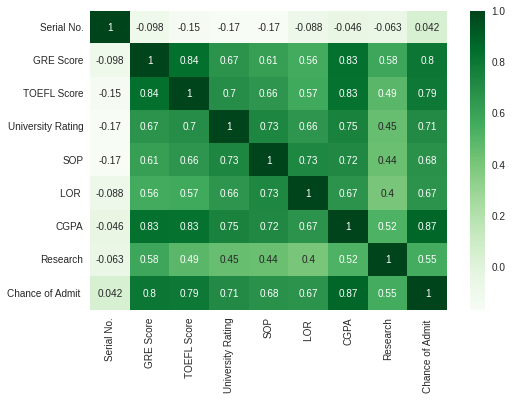

In [229]:
sns.heatmap(corr, cmap = 'Greens', annot = True)

La relación de cada una de las caracteristicas con el objetivo apredecir son positivas, mayores a 0.3, con esto podría confirmar que todas las caracteristicas de este conjunto de datos son necesarias para las predicciones.
 

Promedio de oportunidades de admisión 0.72435


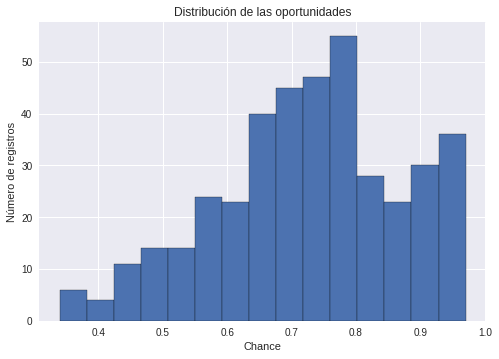

In [230]:
chance_of_admision = df['Chance of Admit ']
print(f"Promedio de oportunidades de admisión {chance_of_admision.mean()}")
plt.style.use('seaborn')
plt.hist(chance_of_admision,bins = 15,edgecolor='black')
plt.title("Distribución de las oportunidades")
plt.xlabel("Chance")
plt.ylabel("Número de registros")
plt.show()

En general, los datos que contiene nuestro dataset, tienen un valor constante y frecuente de posibilidades de ser admitidos a una universidad de 72. Un valor muy alto, considerando los diferentes niveles de dificultad que podrían presentar algunas universidades y examenes

In [283]:
rating_result = df.groupby(['University Rating'])['Chance of Admit '].nunique()
rating_result


University Rating
1    18
2    37
3    39
4    31
5    20
Name: Chance of Admit , dtype: int64

Text(0.5, 1.0, 'Probabilidades de Admisión con respecto al Raiting de la Universidad')

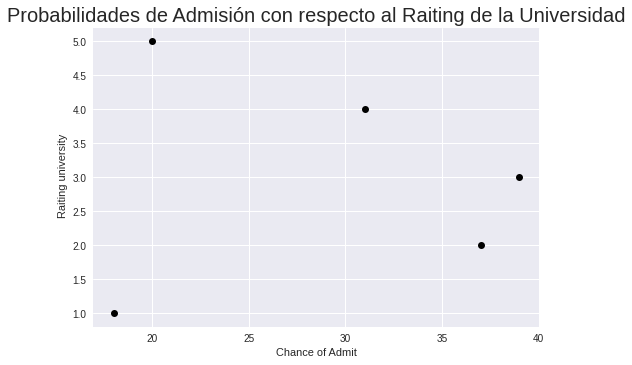

In [430]:
y = np.array(rating_result.index)
X = np.array(rating_result.values)
plt.plot(X,y, 'ko',linewidth=2)
plt.ylabel(" Raiting university")
plt.xlabel("Chance of Admit")
plt.title('Probabilidades de Admisión con respecto al Raiting de la Universidad', fontsize=20,loc='center')

Entre más alto sea el Raiting de calificación de la universidad, menos posibilidades tendremos de ser admitidos a la universidad, siendo University Rating = 1 la maxíma clasificación.

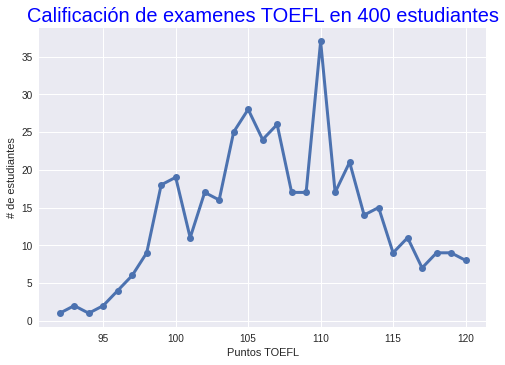

In [374]:

score_toefl = df.groupby(['TOEFL Score'])['TOEFL Score'].count()
x = np.array(score_toefl.index)
y = np.array(score_toefl.values)
plt.plot(x, y,lw=3,marker='o')
plt.ylabel('# de estudiantes')
plt.xlabel('Puntos TOEFL')
plt.title('Calificación de examenes TOEFL en 400 estudiantes', size=20,color='blue')
plt.show()
    

Este tipo de dataset, no solo nos permite ver patrones de admisión, si no tambien, evaluar el desempeño de los estudiantes en los examenes presentados, por ejemplo, en examanes TOEFL, se observa que un total de 37 estudiantes de 400 han obtenido un total de 110 puntos, si lo llevaramos a una escala de calificación, sería algo una calificación equivalente a un 4,4. por debajo de los 70 se puede considerar una calificación negativa, Tomando como base que 120 puntos es la maxíma calificacón

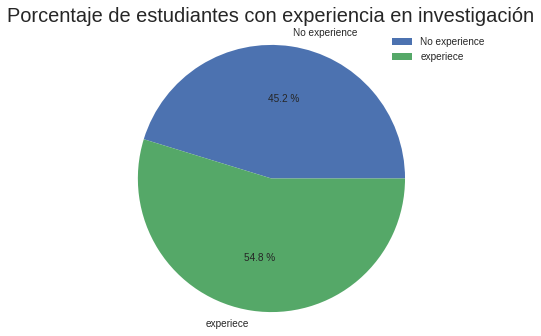

In [399]:
research_xperience = df.groupby(['Research'])['Research'].count()
research_xperience
dict_labels = {'No experience':0,'experiece':1}
plt.pie(research_xperience,labels=dict_labels,autopct="%0.1f %%")
plt.axis('equal')
plt.title('Porcentaje de estudiantes con experiencia en investigación',fontsize=20)
plt.legend()

Podemos ver de igualmente, que hay una tendencia positiva de los estudiantes a pertenecer a grupos de estudio e investigación.

Text(0.5, 1.0, 'Dificultad de las carreras o maestrias')

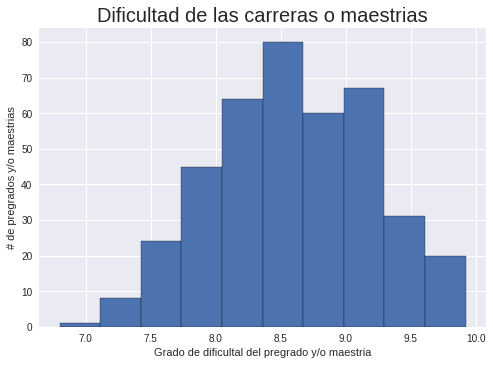

In [533]:

plt.hist(df['CGPA'],edgecolor='k')
plt.ylabel('# de pregrados y/o maestrias')
plt.xlabel('Grado de dificultal del pregrado y/o maestria')
plt.title('Dificultad de las carreras o maestrias', fontsize=20)

Observamos en esta gráfica la calidad de cada una de las carreras a las cuales se aplican, en su mayoría, casi su totalidad, tienen un grado de dificultad muy alto

Text(0.5, 0, 'Grado de dificultal de la carrera')

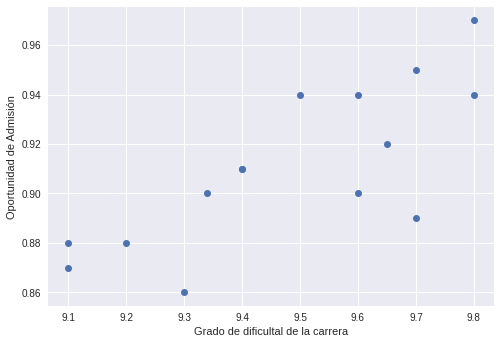

In [531]:
filter = df['CGPA'] > 9
filter2 = df['Chance of Admit '] > .8

carrers_high_dificulty= df[filter & filter2]
x = np.array(carrers_high_dificulty['CGPA'].head(15))
y = np.array(carrers_high_dificulty['Chance of Admit '].head(15))
plt.plot(x,y,'o')
plt.ylabel('Oportunidad de Admisión')
plt.xlabel('Grado de dificultal de la carrera')

In [532]:
carrers_high_dificulty.head(15)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
5,6,330,115,5,4.5,3.0,9.34,1,0.90
22,23,328,116,5,5.0,5.0,9.50,1,0.94
23,24,334,119,5,5.0,4.5,9.70,1,0.95
24,25,336,119,5,4.0,3.5,9.80,1,0.97
25,26,340,120,5,4.5,4.5,9.60,1,0.94
32,33,338,118,4,3.0,4.5,9.40,1,0.91
33,34,340,114,5,4.0,4.0,9.60,1,0.90
34,35,331,112,5,4.0,5.0,9.80,1,0.94
35,36,320,110,5,5.0,5.0,9.20,1,0.88


Para el gráfico anterior, quise analizar la oportunidad de ser admitido a una carrera cuyo graado de dificultad es alto, la manera en como interpreto esta información es que a mayor grado de dificultas, las oportunidades de ser admitido pueden aumentar, pero no por que sea facil ingresar, si no que pueden inferir una cantidad de variables y factores que afecten el proceso de selección.

# Valores atípicos

Quisiera solo analizar en nuestro objetivo algún valor atípico. Un valor atípico en este conjunto de datos, sería un valor que este por encima de las probabilidades, que en su punto maxímo sería 0.97, tal como se muestra en el gráfico de caja siguiente.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


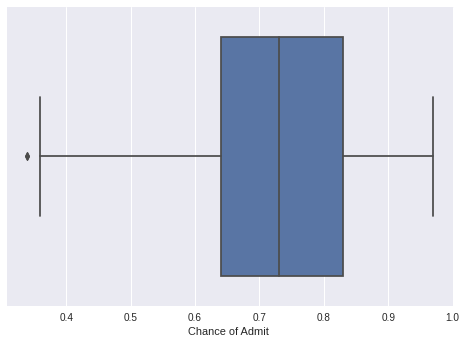

In [536]:
sns.boxplot(df['Chance of Admit '])